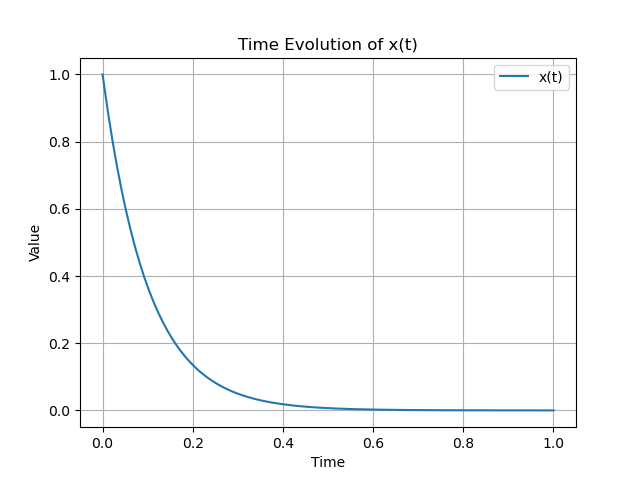

In [17]:
from pyomo.environ import *
from pyomo.dae import *
import matplotlib.pyplot as plt
plt.clf()
# Define a model
m = ConcreteModel()

# Define time and discretize it
m.t = ContinuousSet(bounds=(0, 1))
#m.tau = TransformationFactory('dae.finite_difference')
#m.tau.apply_to(m, nfe=500, scheme='BACKWARD')

# Define variables
m.x = Var(m.t)
m.dxdt = DerivativeVar(m.x)

# Initial condition
#m.ic = Constraint(expr=m.x[0] == 1)
m.x[0].fix(1)  # or any other non-zero value

# DAE Equation (a simple differential equation: dx/dt + 10*x = 0)
#time constant should be 100ms
m.ode = Constraint(m.t, rule=lambda m, t: m.dxdt[t] + 10*m.x[t] == 0)

# Solve the model
#solver = SolverFactory('ipopt')
#results = solver.solve(m, tee=True)

def simulate_model(m):
    # Simulate the model using casadi
    sim = Simulator(m, package='scipy')
    #sim = Simulator(m, package='casadi')
    tsim, profiles = sim.simulate(numpoints=100, integrator='vode')

    # Discretize model using Orthogonal Collocation
    #discretizer = TransformationFactory('dae.collocation')
    m.tau = TransformationFactory('dae.finite_difference')
    m.tau.apply_to(m, nfe=500, scheme='BACKWARD')   
    
    #discretizer.apply_to(m, nfe=10, ncp=3)

    # Initialize the discretized model using the simulator profiles
    sim.initialize_model()

    return sim, tsim, profiles

sim, tsim, profiles = simulate_model(m)

# Extract the results and plot
time_points = [t for t in m.t]
x_values = [m.x[t]() for t in m.t]
%matplotlib ipympl
plt.plot(time_points, x_values, label='x(t)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.title('Time Evolution of x(t)')
plt.show()


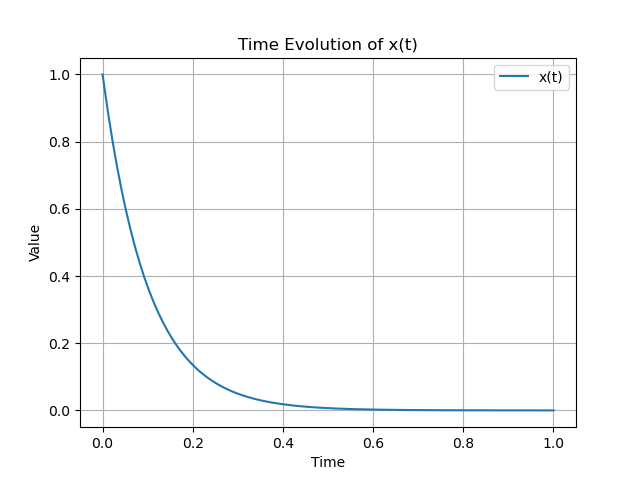

In [24]:
from pyomo.environ import *
from pyomo.dae import *
import matplotlib.pyplot as plt
plt.clf()
# Define a model
m = ConcreteModel()

# Define time and discretize it
m.t = ContinuousSet(bounds=(0, 1))

# Define variables
m.x = Var(m.t)
m.dxdt = DerivativeVar(m.x)

# Initial condition
m.x[0].fix(1)  # or any other non-zero value

# DAE Equation (a simple differential equation: dx/dt + 10*x = 0)
#time constant should be 100ms
m.ode = Constraint(m.t, rule=lambda m, t: m.dxdt[t] + 10*m.x[t] == 0)

def simulate_model(m):
    sim = Simulator(m, package='scipy')
    tsim, profiles = sim.simulate(numpoints=100, integrator='vode')

    # Discretize model using Orthogonal Collocation
    m.tau = TransformationFactory('dae.finite_difference')
    m.tau.apply_to(m, nfe=500, scheme='BACKWARD')   

    # Initialize the discretized model using the simulator profiles
    sim.initialize_model()

    return sim, tsim, profiles

sim, tsim, profiles = simulate_model(m)

# Extract the results and plot
time_points = [t for t in m.t]
x_values = [m.x[t]() for t in m.t]
%matplotlib ipympl
plt.plot(m.t, x_values, label='x(t)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.title('Time Evolution of x(t)')
plt.show()

In [30]:
import numpy as np
np.mean(np.linspace(1,100,100))

50.5

In [29]:
np.linspace(1,100,100)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])

In [33]:
(945+8917)/(945+1652+8917+23688)
945/8917

0.10597734664124706